# Decision Tree Module
In this module, we introduce the decision tree model: an greedy, recursive algorithm that 

talk about robustness and variance of trees

talk about pruning and cut off criteria

structure of model depends on data, unlike other models

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
from sklearn.datasets import make_circles

<Axes: >

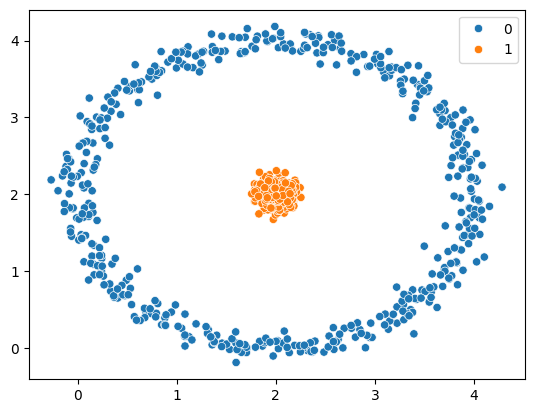

In [66]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0, random_state=67)
X = (X + 1) * 2  # Shifts from [-1,1] to [0,4]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
# plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Outer circle')
# plt.scatter(X[y==1, 0], X[y==1, 1], c='green', label='Inner circle')
# plt.legend()
# plt.title('Raw make_circles data')
# plt.axis('equal')
# plt.show()

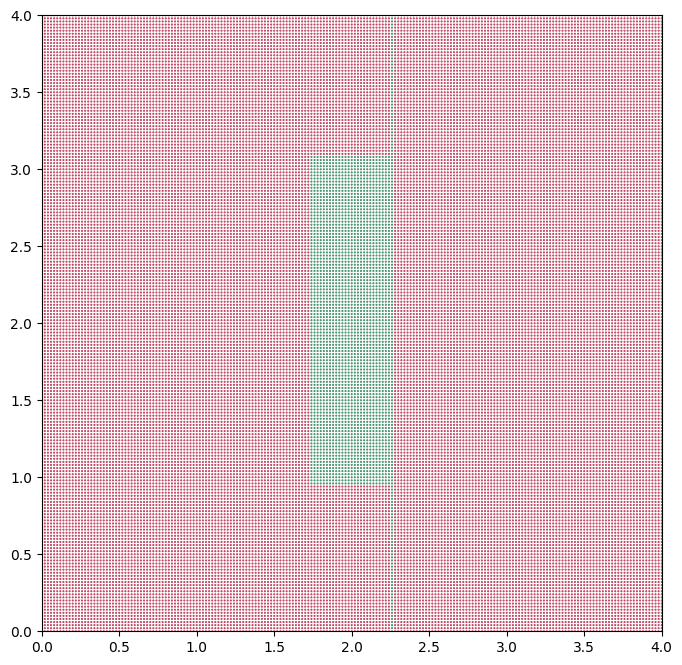

In [59]:
import numpy as np

# Create a dense grid for decision boundary
h = 0.02  # Step size (smaller = denser)
x_min, x_max = -0.1, 4.1
y_min, y_max = -0.1, 4.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train a classifier (example with k-NN)
from sklearn.neighbors import KNeighborsClassifier

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X, y)

# Predict on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(xx, yy, c=Z, cmap="RdYlGn", alpha=0.8, s=1, marker=".")
plt.xlim(0, 4)
plt.ylim(0, 4)
# plt.title('Classification task: Circle', fontsize=20, color='darkred')
plt.show()

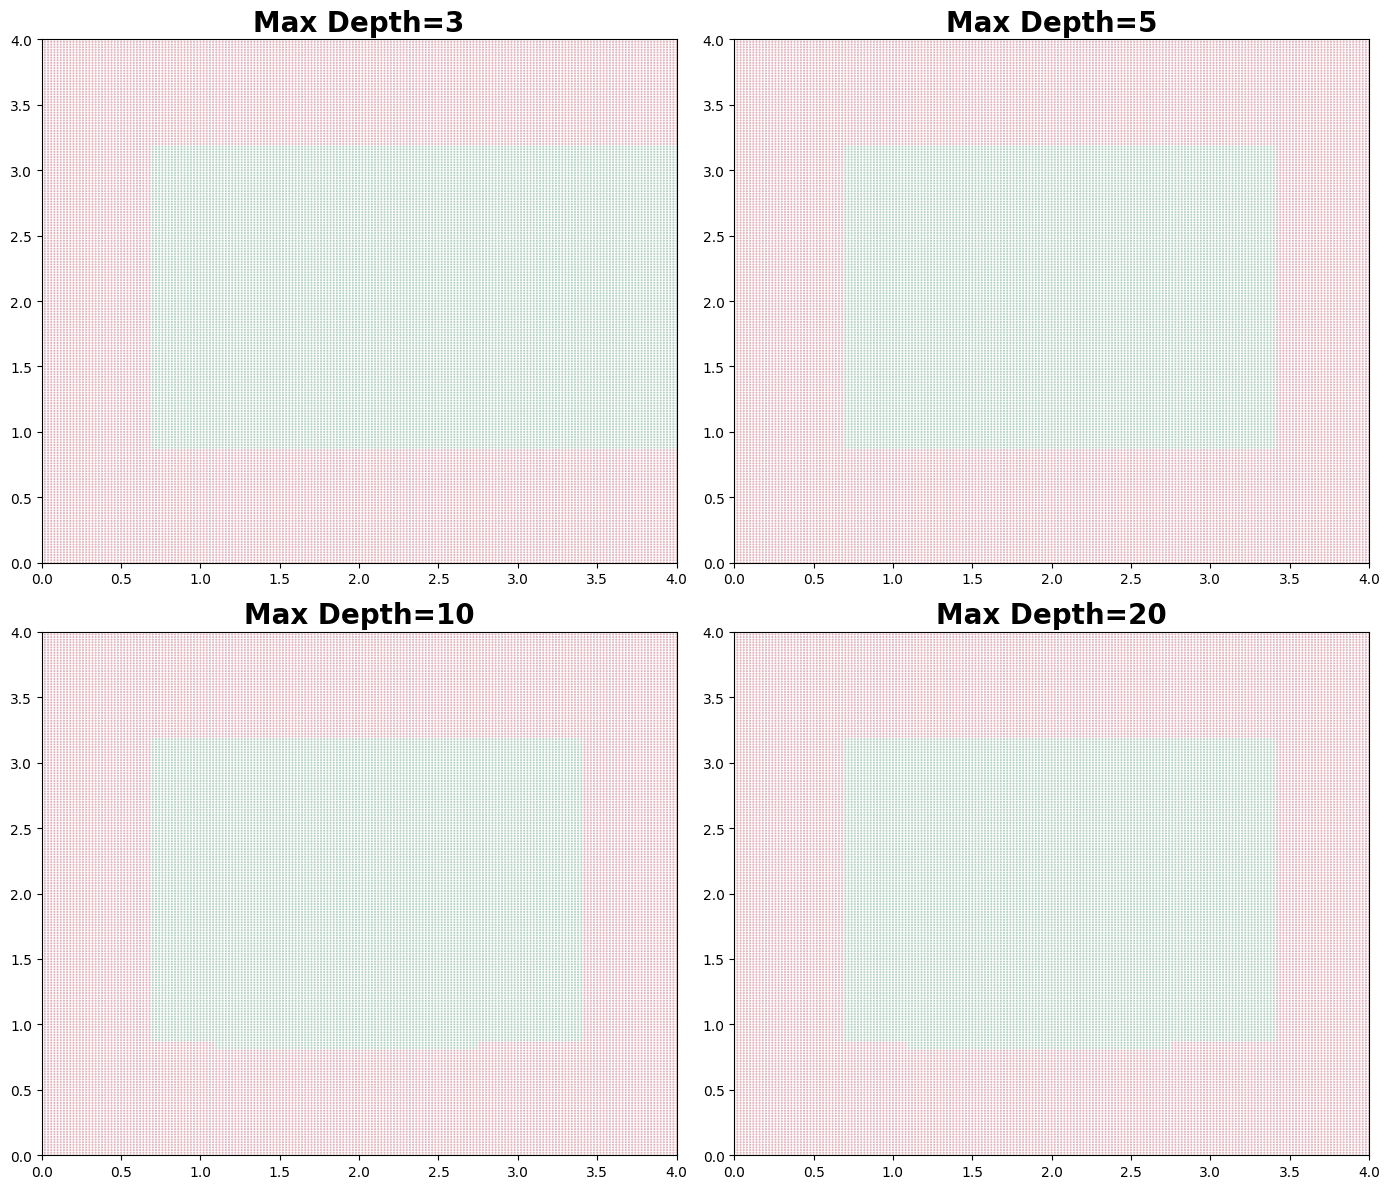

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

depths = [3, 5, 10, 20]
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
X = (X + 1) * 2

for ax, depth in zip(axes, depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X, y)

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.scatter(xx, yy, c=Z, cmap="RdYlGn", alpha=0.3, s=1, marker=".")
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_title(f"Max Depth={depth}", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.show()

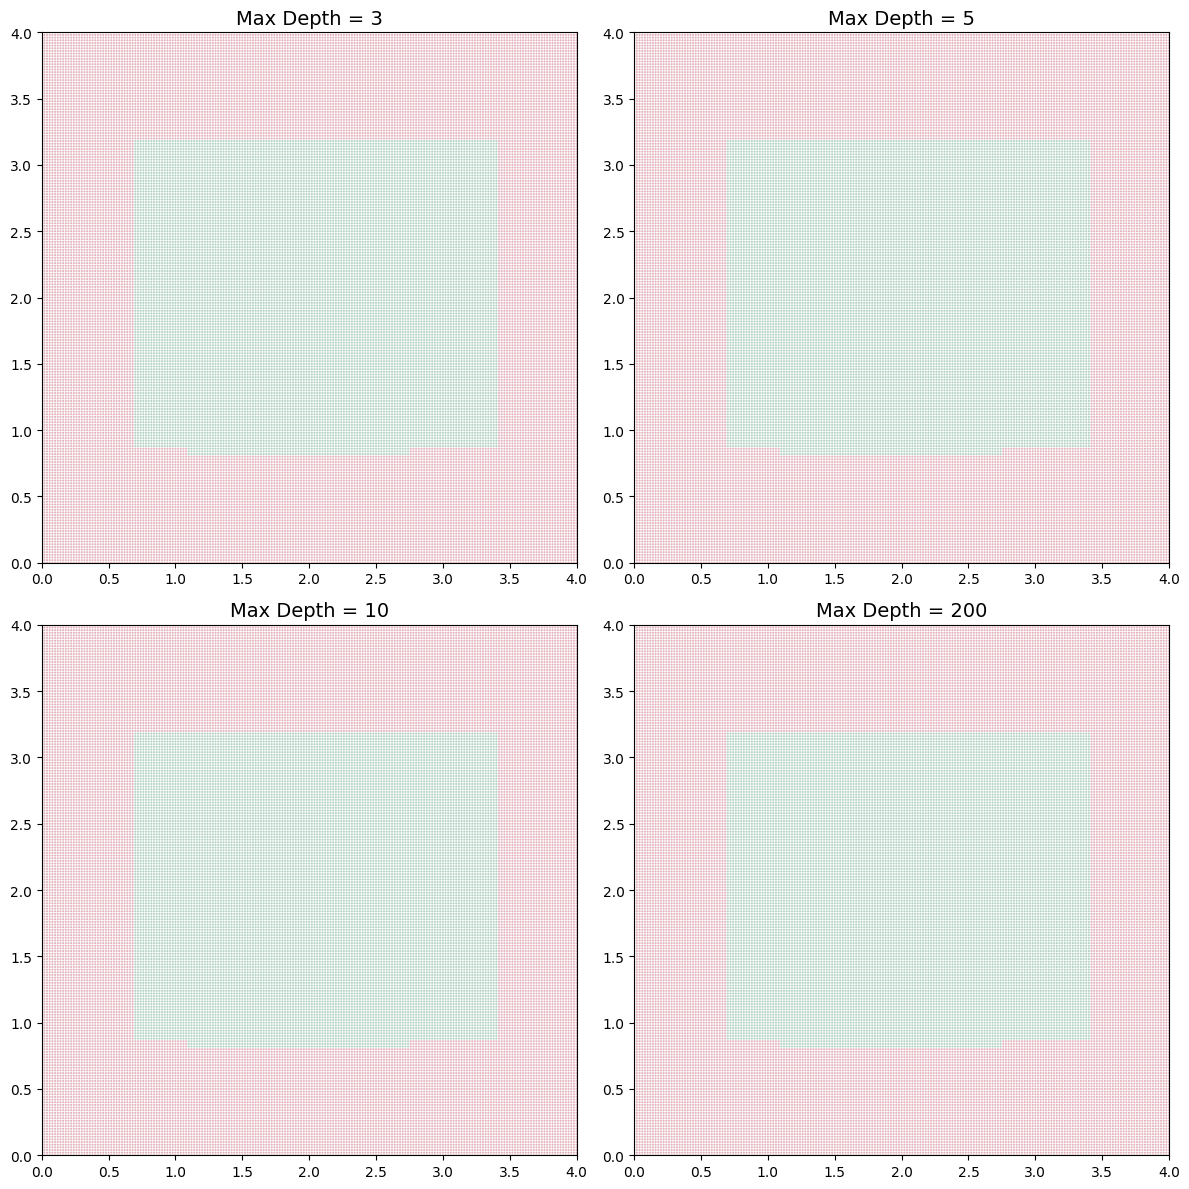

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
depths = [3, 5, 10, 200]

for ax, depth in zip(axes.flat, depths):
    dt = DecisionTreeClassifier(max_depth=None, random_state=42)
    dt.fit(X, y)

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.scatter(xx, yy, c=Z, cmap="RdYlGn", alpha=0.3, s=1, marker=".")
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_title(f"Max Depth = {depth}", fontsize=14)

plt.tight_layout()
plt.show()